# Hypothesis 3

### Cancellations
Certain airlines may have been better equipped to handle snowstorms and minimize cancellations  compared to others

In [1]:
from sql_functions import get_dataframe

### Get weather stacked table from SQL

In [10]:
schema = 'hh_analytics_24_1'

sql_query = f'SELECT date, faa FROM {schema}.weather_stacked_groupx'
weather_stacked = get_dataframe(sql_query)

weather_stacked.head(20)
weather_stacked.tail(20)

,date,faa
40,2010-02-11,IAD
41,2010-02-12,IAD
42,2010-02-13,IAD
43,2010-02-14,IAD
44,2010-02-15,IAD
45,2010-02-01,PHL
46,2010-02-02,PHL
47,2010-02-03,PHL
48,2010-02-04,PHL
49,2010-02-05,PHL


In [8]:
schema = 'hh_analytics_24_1'

sql_query_2 = f'SELECT flight_date, airline, dep_delay, arr_delay, cancelled, diverted, origin, dest FROM {schema}.flights_group_x'
flights = get_dataframe(sql_query_2)

flights.head(20)
flights.tail(20)

,flight_date,airline,dep_delay,arr_delay,cancelled,diverted,origin,dest
50116,2010-02-28,US,0.0,0.0,0,0,PHX,JFK
50117,2010-02-01,WN,-2.0,-15.0,0,0,BWI,LGA
50118,2010-02-01,WN,9.0,37.0,0,0,BWI,LGA
50119,2010-02-01,WN,-5.0,-7.0,0,0,BWI,LGA
50120,2010-02-01,WN,5.0,-16.0,0,0,LGA,BWI
50121,2010-02-01,WN,-4.0,-42.0,0,0,LGA,BWI
50122,2010-02-01,WN,15.0,-16.0,0,0,LGA,BWI
50123,2010-02-01,WN,-2.0,-38.0,0,0,LGA,MDW
50124,2010-02-01,WN,36.0,1.0,0,0,LGA,MDW
50125,2010-02-01,WN,-3.0,-43.0,0,0,LGA,MDW


In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50136 entries, 0 to 50135
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   flight_date  50136 non-null  datetime64[ns]
 1   airline      50136 non-null  object        
 2   dep_delay    43958 non-null  float64       
 3   arr_delay    43748 non-null  float64       
 4   cancelled    50136 non-null  int64         
 5   diverted     50136 non-null  int64         
 6   origin       50136 non-null  object        
 7   dest         50136 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.1+ MB


In [14]:
import pandas as pd

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then count the number of cancelled flights
cancelled_flights = flights[flights['cancelled'] == 1].groupby(['flight_date', 'airline']).size().reset_index(name='cancelled_count')

# Display the result
cancelled_flights.head(20)


,flight_date,airline,cancelled_count
0,2010-02-01,AA,11
1,2010-02-01,DL,3
2,2010-02-01,FL,2
3,2010-02-01,MQ,2
4,2010-02-01,OH,2
5,2010-02-01,US,6
6,2010-02-02,AA,5
7,2010-02-02,CO,1
8,2010-02-02,DL,2
9,2010-02-02,FL,2


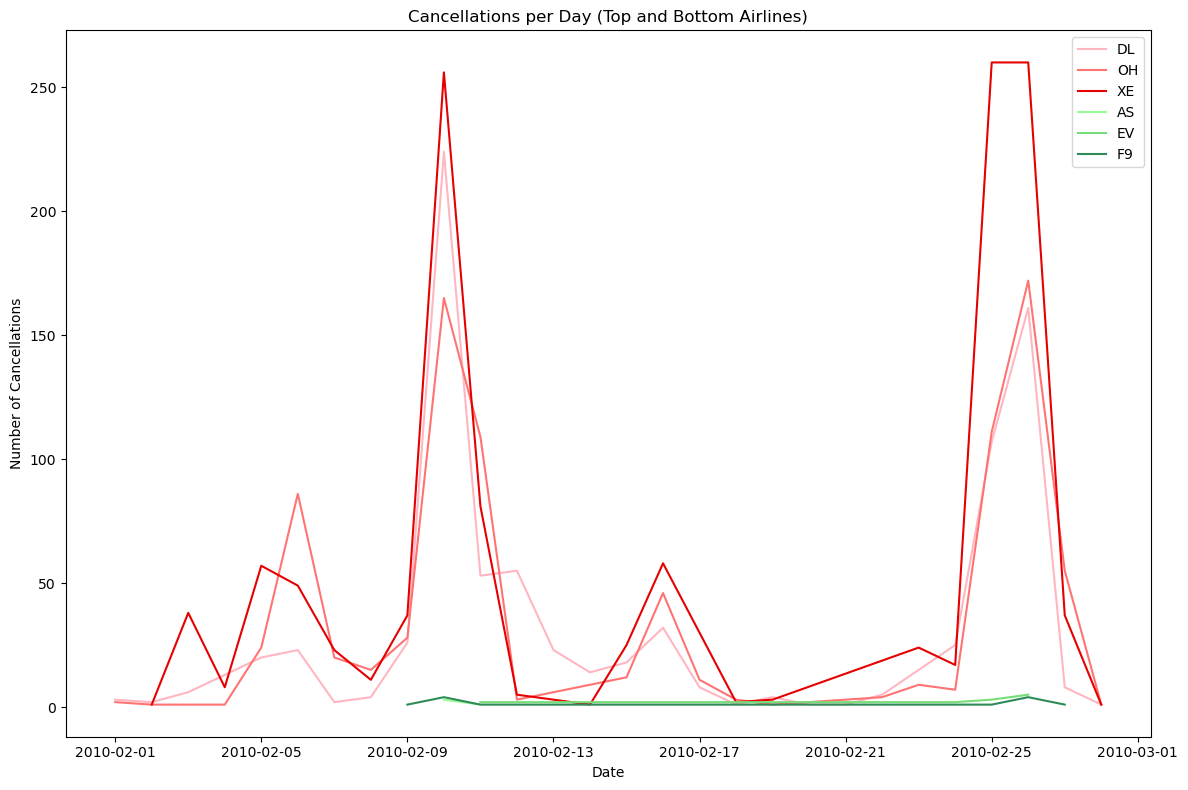

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then count the number of cancelled flights
cancelled_flights = flights[flights['cancelled'] == 1].groupby(['flight_date', 'airline']).size().reset_index(name='cancelled_count')

# Calculate total cancellations per airline
total_cancellations = cancelled_flights.groupby('airline')['cancelled_count'].sum().reset_index()

# Sort by total cancellations
total_cancellations_sorted = total_cancellations.sort_values(by='cancelled_count')

# Get top 3 and bottom 3 airlines by total cancellations
top_3_airlines = total_cancellations_sorted.tail(3)['airline']
bottom_3_airlines = total_cancellations_sorted.head(3)['airline']

# Filter cancelled_flights DataFrame for top 3 and bottom 3 airlines
top_3_cancelled = cancelled_flights[cancelled_flights['airline'].isin(top_3_airlines)]
bottom_3_cancelled = cancelled_flights[cancelled_flights['airline'].isin(bottom_3_airlines)]

# Define custom colors for top and bottom airlines
top_colors = ['#FFB6C1', '#FF7373', '#E60000']
bottom_colors = ['#98FB98', '#77DD77', '#2E8B57']

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 and bottom 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_cancelled[top_3_cancelled['airline'] == airline]
    ax.plot(data['flight_date'], data['cancelled_count'], label=airline, color=top_colors[i])

for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_cancelled[bottom_3_cancelled['airline'] == airline]
    ax.plot(data['flight_date'], data['cancelled_count'], label=airline, color=bottom_colors[i])

ax.set_title('Cancellations per Day (Top and Bottom Airlines)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cancellations')
ax.legend()

plt.tight_layout()
plt.show()


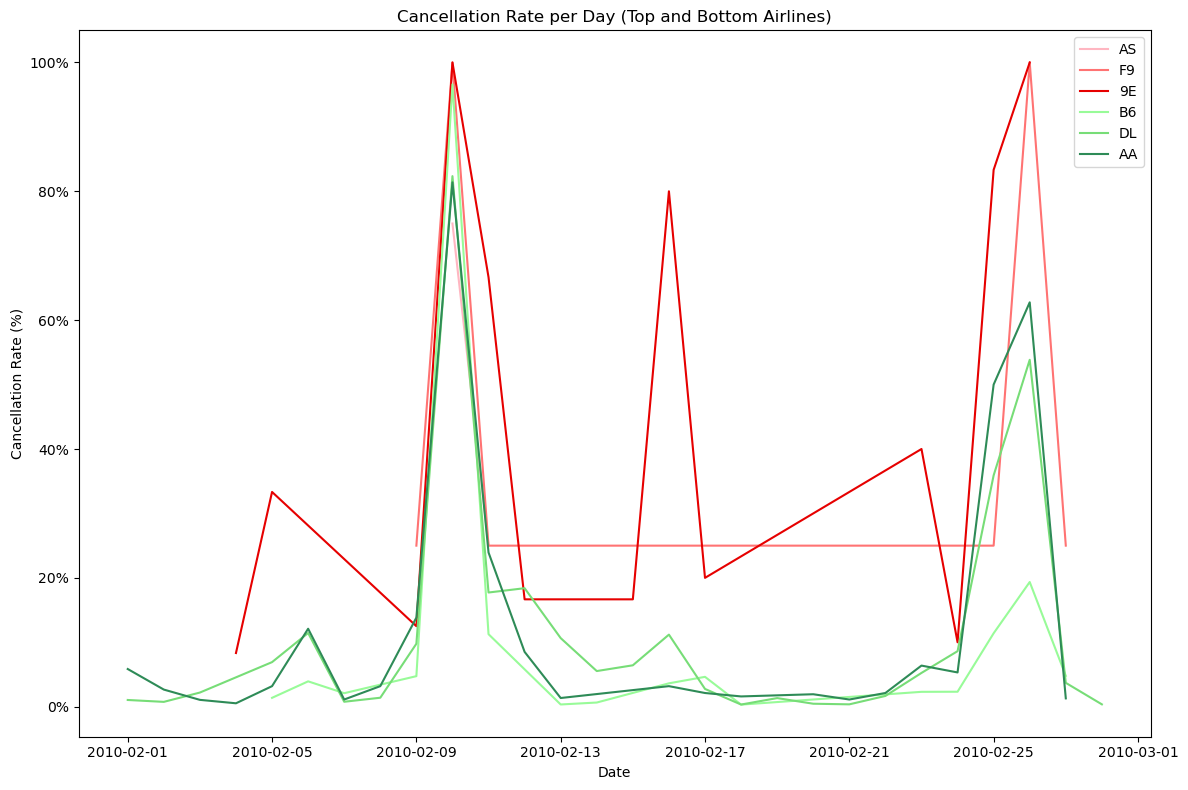

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then count the number of cancelled flights and total flights
cancelled_flights = flights[flights['cancelled'] == 1].groupby(['flight_date', 'airline']).size().reset_index(name='cancelled_count')
total_flights = flights.groupby(['flight_date', 'airline']).size().reset_index(name='total_flights')

# Merge cancelled_flights and total_flights DataFrames to calculate cancellation rate
merged_df = pd.merge(cancelled_flights, total_flights, on=['flight_date', 'airline'])

# Calculate cancellation rate
merged_df['cancellation_rate'] = merged_df['cancelled_count'] / merged_df['total_flights']

# Calculate cancellation rate per day for each airline
cancellation_rate_per_day = merged_df.groupby(['flight_date', 'airline'])['cancellation_rate'].mean().reset_index()

# Sort by cancellation rate
sorted_cancellation_rate = cancellation_rate_per_day.groupby('airline')['cancellation_rate'].mean().reset_index()
top_3_airlines = sorted_cancellation_rate.sort_values(by='cancellation_rate', ascending=False).head(3)['airline']
bottom_3_airlines = sorted_cancellation_rate.sort_values(by='cancellation_rate').head(3)['airline']

# Filter cancellation rate per day DataFrame for top 3 and bottom 3 airlines
top_3_cancellation_rate = cancellation_rate_per_day[cancellation_rate_per_day['airline'].isin(top_3_airlines)]
bottom_3_cancellation_rate = cancellation_rate_per_day[cancellation_rate_per_day['airline'].isin(bottom_3_airlines)]

# Define custom colors for top and bottom airlines
top_colors = ['#FFB6C1', '#FF7373', '#E60000']
bottom_colors = ['#98FB98', '#77DD77', '#2E8B57']

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_cancellation_rate[top_3_cancellation_rate['airline'] == airline]
    ax.plot(data['flight_date'], data['cancellation_rate'] * 100, label=airline, color=top_colors[i])

# Plot for bottom 3 airlines with custom colors
for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_cancellation_rate[bottom_3_cancellation_rate['airline'] == airline]
    ax.plot(data['flight_date'], data['cancellation_rate'] * 100, label=airline, color=bottom_colors[i])

ax.set_title('Cancellation Rate per Day (Top and Bottom Airlines)')
ax.set_xlabel('Date')
ax.set_ylabel('Cancellation Rate (%)')  # Update ylabel to indicate percentage
ax.legend()

# Update y-axis ticks to represent percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x / 100)))

plt.tight_layout()
plt.show()


## Delays


Certain airlines may have been better equipped to handle snowstorms and minimize departure and arrival compared to others

In [23]:
import pandas as pd

# Grouping by airline and flight date and summing departure delays
flights_delayed = flights.groupby(['airline', 'flight_date'])[['dep_delay', 'arr_delay']].sum().reset_index()

flights_delayed

,airline,flight_date,dep_delay,arr_delay
0,9E,2010-02-01,377.0,357.0
1,9E,2010-02-02,-21.0,-121.0
2,9E,2010-02-03,-26.0,-100.0
3,9E,2010-02-04,10.0,40.0
4,9E,2010-02-05,-38.0,-58.0
...,...,...,...,...
433,YV,2010-02-24,827.0,760.0
434,YV,2010-02-25,466.0,480.0
435,YV,2010-02-26,310.0,218.0
436,YV,2010-02-27,-19.0,-226.0


### Arrival Delays

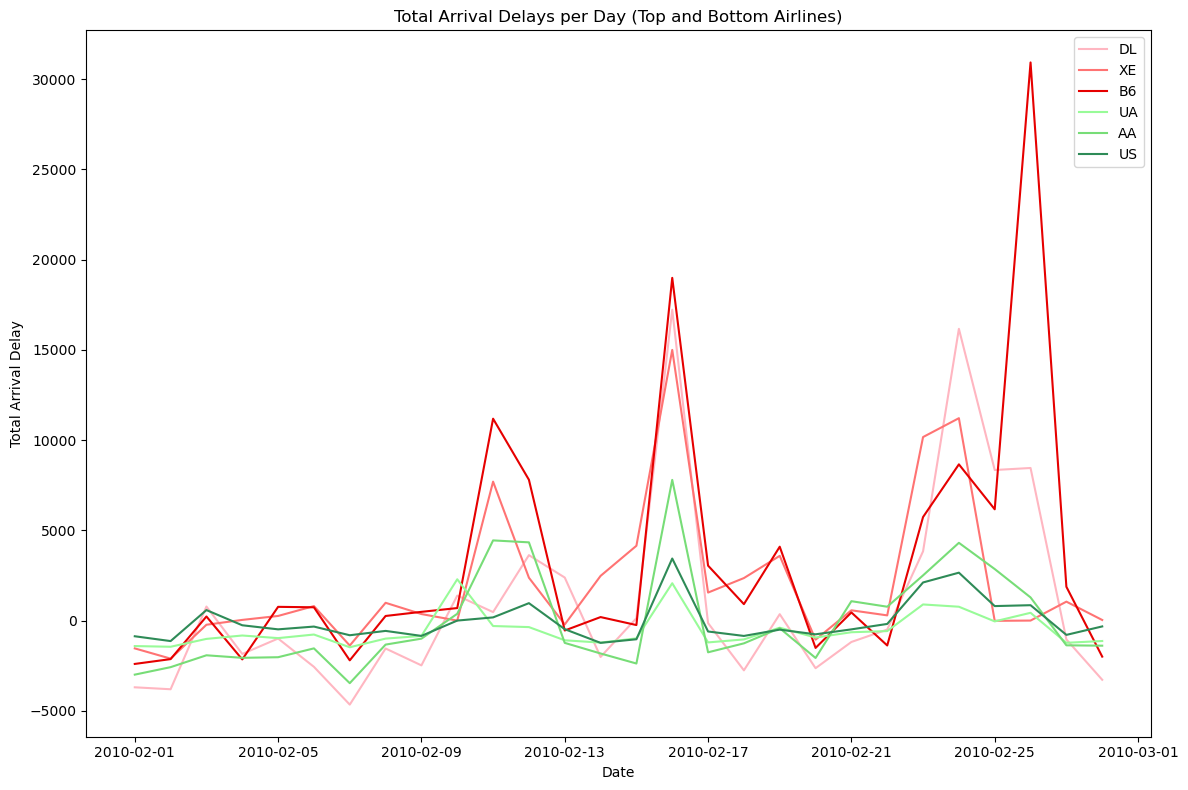

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then sum the arrival delays
arr_delay_sum = flights.groupby(['flight_date', 'airline'])['arr_delay'].sum().reset_index()

# Calculate total arrival delays per airline
total_arr_delay = arr_delay_sum.groupby('airline')['arr_delay'].sum().reset_index()

# Sort by total arrival delays
total_arr_delay_sorted = total_arr_delay.sort_values(by='arr_delay')

# Get top 3 and bottom 3 airlines by total arrival delays
top_3_airlines = total_arr_delay_sorted.tail(3)['airline']
bottom_3_airlines = total_arr_delay_sorted.head(3)['airline']

# Filter arrival delays DataFrame for top 3 and bottom 3 airlines
top_3_arr_delay = arr_delay_sum[arr_delay_sum['airline'].isin(top_3_airlines)]
bottom_3_arr_delay = arr_delay_sum[arr_delay_sum['airline'].isin(bottom_3_airlines)]

# Define custom colors for each airline
top_colors = ['#FFB6C1', '#FF7373', '#E60000']  # Customize as needed
bottom_colors = ['#98FB98', '#77DD77', '#2E8B57']  # Customize as needed

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_arr_delay[top_3_arr_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['arr_delay'], label=airline, color=top_colors[i])

# Plot for bottom 3 airlines with custom colors
for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_arr_delay[bottom_3_arr_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['arr_delay'], label=airline, color=bottom_colors[i])

ax.set_title('Total Arrival Delays per Day (Top and Bottom Airlines)')
ax.set_xlabel('Date')
ax.set_ylabel('Total Arrival Delay')
ax.legend()

plt.tight_layout()
plt.show()


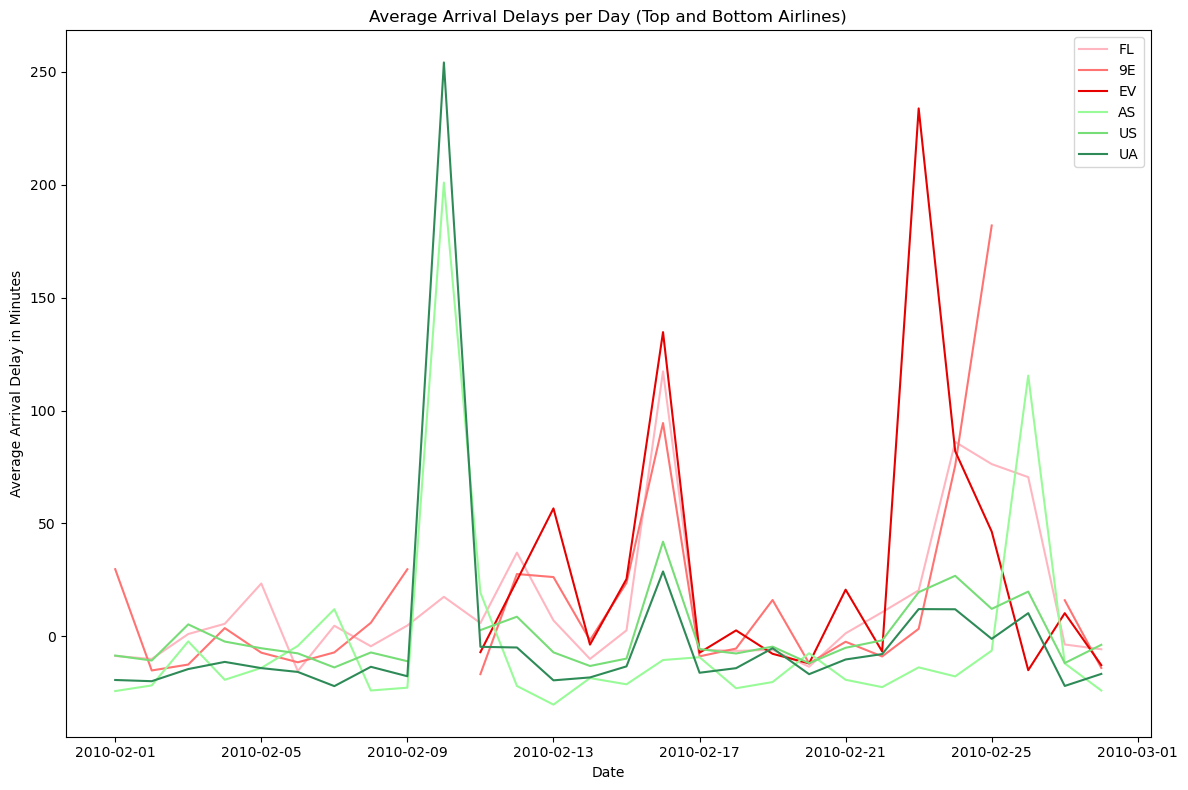

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then sum the arrival delays
arr_delay_mean = flights.groupby(['flight_date', 'airline'])['arr_delay'].mean().reset_index()

# Calculate total arrival delays per airline
total_arr_delay = arr_delay_mean.groupby('airline')['arr_delay'].mean().reset_index()

# Sort by total arrival delays
total_arr_delay_sorted = total_arr_delay.sort_values(by='arr_delay')

# Get top 3 and bottom 3 airlines by total arrival delays
top_3_airlines = total_arr_delay_sorted.tail(3)['airline']
bottom_3_airlines = total_arr_delay_sorted.head(3)['airline']

# Filter arrival delays DataFrame for top 3 and bottom 3 airlines
top_3_arr_delay = arr_delay_mean[arr_delay_mean['airline'].isin(top_3_airlines)]
bottom_3_arr_delay = arr_delay_mean[arr_delay_mean['airline'].isin(bottom_3_airlines)]

# Define custom colors for each airline
top_colors = ['#FFB6C1', '#FF7373', '#E60000']  # Customize as needed
bottom_colors = ['#98FB98', '#77DD77', '#2E8B57']  # Customize as needed

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_arr_delay[top_3_arr_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['arr_delay'], label=airline, color=top_colors[i])

# Plot for bottom 3 airlines with custom colors
for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_arr_delay[bottom_3_arr_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['arr_delay'], label=airline, color=bottom_colors[i])

ax.set_title('Average Arrival Delays per Day (Top and Bottom Airlines)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Arrival Delay in Minutes')
ax.legend()

plt.tight_layout()
plt.show()


### Depature Delay

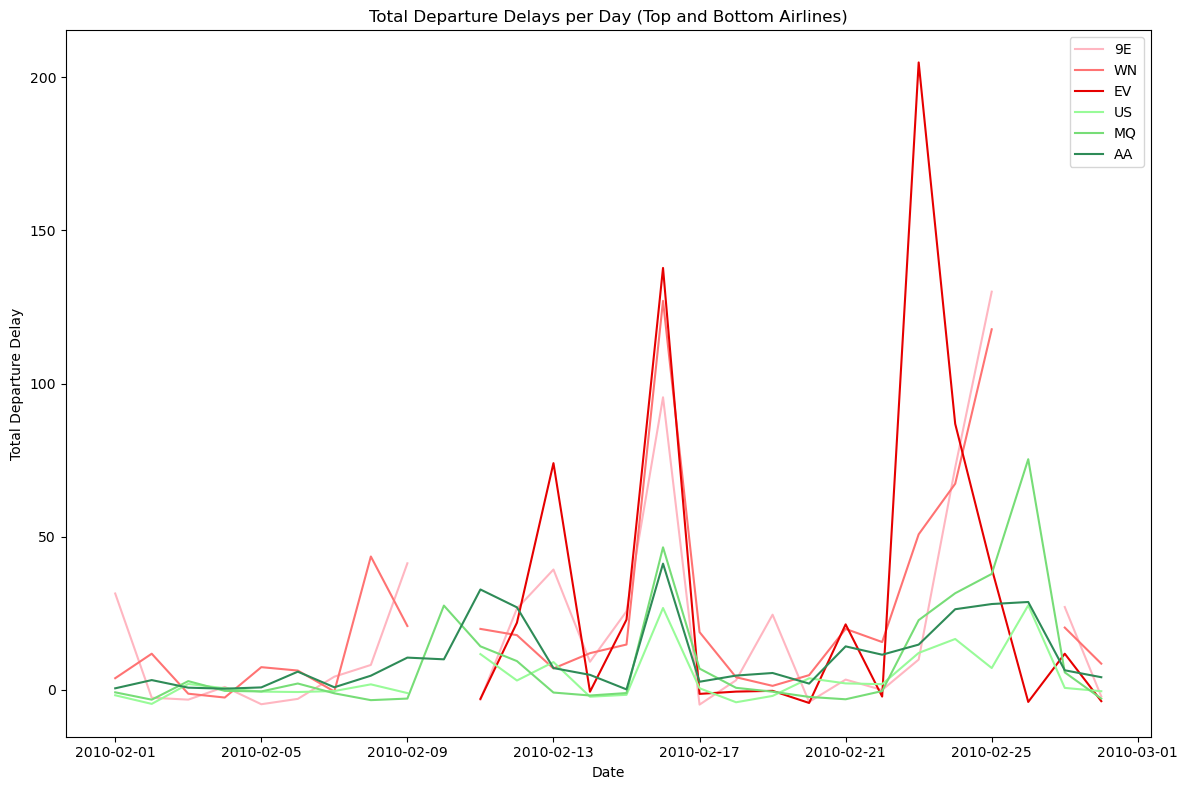

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then calculate the mean departure delay per date for each airline
dep_delay_mean = flights.groupby(['flight_date', 'airline'])['dep_delay'].mean().reset_index()

# Calculate total departure delays per airline
total_dep_delay = dep_delay_mean.groupby('airline')['dep_delay'].mean().reset_index()

# Sort by total departure delays
total_dep_delay_sorted = total_dep_delay.sort_values(by='dep_delay')

# Get top 3 and bottom 3 airlines by total departure delays
top_3_airlines = total_dep_delay_sorted.tail(3)['airline']
bottom_3_airlines = total_dep_delay_sorted.head(3)['airline']

# Filter departure delays DataFrame for top 3 and bottom 3 airlines
top_3_dep_delay = dep_delay_mean[dep_delay_mean['airline'].isin(top_3_airlines)]
bottom_3_dep_delay = dep_delay_mean[dep_delay_mean['airline'].isin(bottom_3_airlines)]

# Define custom colors for each airline
top_colors = ['#FFB6C1', '#FF7373', '#E60000']  # Customize as needed
bottom_colors = ['#98FB98', '#77DD77', '#2E8B57']  # Customize as needed

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_dep_delay[top_3_dep_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['dep_delay'], label=airline, color=top_colors[i])

# Plot for bottom 3 airlines with custom colors
for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_dep_delay[bottom_3_dep_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['dep_delay'], label=airline, color=bottom_colors[i])

ax.set_title('Average Departure Delays per Day (Top and Bottom Airlines)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Departure Delay in Minutes')
ax.legend()

plt.tight_layout()
plt.show()
